In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('./raw_with_label_old.csv',index_col=0)

In [6]:
df = df[df.y.notnull()]

In [7]:
df.head()

,watch-title,y,watch-view-count,watch-time-text,content_watch-info-tag-list,watch7-headline,watch7-user-header,watch8-sentiment-actions,og:image,og:image:width,og:image:height,og:description,og:video:width,og:video:height,og:video:tag,channel_link_0
0,How to Become A Machine Learning Engineer | Ho...,0.0,28.028 visualizações,Publicado em 3 de set. de 2018,Educação,#MachineLearningAlgorithms #Datasciencecourse ...,Simplilearn\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarre...,28.028 visualizações\n\n\n\n\n\n\n\n601\n\nGos...,https://i.ytimg.com/vi/-5hEYRt8JE0/maxresdefau...,1280.0,720.0,"This video on ""How to become a Machine Learnin...",1280.0,720.0,simplilearn,/channel/UCsvqVGtbbyHaMoevxPAq9Fg
1,BLOOPERS - Behind The Scenes. | DATA SCIENCE x...,0.0,1.131 visualizações,Publicado em 16 de nov. de 2018,Pessoas e blogs,#FAIL #insidezalando\n\n\n\n BLOOPERS - Beh...,Inside Zalando\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarr...,1.131 visualizações\n\n\n\n\n\n\n\n20\n\nGosto...,https://i.ytimg.com/vi/-7GiiT0yEyk/maxresdefau...,1280.0,720.0,#FAIL :) Have fun - and join our teams: https:...,1280.0,720.0,employer branding,/channel/UCTPin8TK-KRSI9zo9FoxG0g
2,Michael I. Jordan: Machine Learning: Dynamical...,1.0,1.816 visualizações,Publicado em 2 de mai. de 2019,Licença de atribuição Creative Commons (reutil...,#purdue #michaelijordan #engineering\n\n\n\n ...,Purdue Engineering\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,1.816 visualizações\n\n\n\n\n\n\n\n42\n\nGosto...,https://i.ytimg.com/vi/-8yYFdV5SOc/maxresdefau...,1280.0,720.0,2019 Purdue Engineering Distinguished Lecture ...,1280.0,720.0,electrical engineer,/channel/UC8FZ6dzFVkCACLH9YoMNFog
3,Best Deep Learning Tools - Welcome.AI,0.0,1.171 visualizações,Publicado em 13 de ago. de 2019,Ciência e tecnologia,Best Deep Learning Tools - Welcome.AI,Welcome.AI\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarregan...,1.171 visualizações\n\n\n\n\n\n\n\n14\n\nGosto...,https://i.ytimg.com/vi/-9LLrwW1Vdo/maxresdefau...,1280.0,720.0,A collection of the 5 best deep learning tools...,1280.0,720.0,Watson,/channel/UC_215Y7rOAsqnFkO_hnpdIg
4,Kaggle Live-Coding: RNNs for Sarcasm Detection...,1.0,1.228 visualizações,Transmitido ao vivo em 30 de nov. de 2018,Ciência e tecnologia,Kaggle Live-Coding: RNNs for Sarcasm Detection...,Kaggle\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarregando.....,1.228 visualizações\n\n\n\n\n\n\n\n28\n\nGosto...,https://i.ytimg.com/vi/-9U84J178OQ/maxresdefau...,1280.0,720.0,Join Kaggle data scientist Rachael live as she...,1280.0,720.0,CS,/channel/UCSNeZleDn9c74yQc-EKnVTA


# 1.0 - Data Cleaning

In [8]:
## Create DF to store clean values
df2 = pd.DataFrame(index=df.index)

In [9]:
## Clean Watch Time to DATE
clean_date = df['watch-time-text'].str.extract(r'(\d+) de ([a-z]+)\. de (\d+)')
clean_date[0] = clean_date[0].map(lambda x: "0"+x[0] if len(x)==1 else x)

month_map = {
    'jan':'Jan',
    'fev':'Feb',
    'mar':'Mar',
    'abr':'Apr',
    'mai':'May',
    'jun':'Jun',
    'jul':'Jul',
    'ago':'Aug',
    'set':'Sep',
    'out':'Oct',
    'nov':'Nov',
    'dez':'Dec'
}
clean_date[1] = clean_date[1].map(month_map)
clean_date = clean_date.apply(lambda x: ' '.join(x), axis=1)
df2['date'] = pd.to_datetime(clean_date, format="%d %b %Y")

In [10]:
## Clean View Count
views = df['watch-view-count'].str.extract(r'(\d+\.?\d*)', expand=False).str.replace('.','').fillna(0).astype(int)
df2['views'] = views

# 2.0 - Features

In [12]:
features = pd.DataFrame(index=df2.index)
y = df['y'].copy()

In [22]:
features['time_since_pub'] = (pd.to_datetime('2019-12-03') - df2['date'])/np.timedelta64(1,'D')
features['views'] = df2.views
features['views_per_day'] = features.views/features.time_since_pub
features.drop(['time_since_pub'],axis=1,inplace=True)

In [24]:
features.head()

,views,views_per_day
0,28028,61.464912
1,1131,2.960733
2,1816,8.446512
3,1171,10.455357
4,1228,3.336957


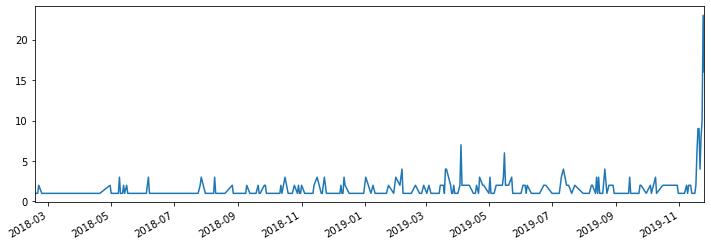

In [28]:
df2.date.value_counts().plot(figsize=(12,4))

In [29]:
Xtrain, Xval = features[df2.date < '2019-04-01'], features[df2.date>='2019-04-01']
ytrain, yval = y[df2.date < '2019-04-01'], y[df2.date>='2019-04-01']

In [30]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((228, 2), (270, 2), (228,), (270,))

In [32]:
mdl = DecisionTreeClassifier(random_state=0, max_depth=2, class_weight='balanced')
mdl.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [36]:
p = mdl.predict_proba(Xval)[:,1]

In [37]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [38]:
average_precision_score(yval,p)
## Will use this as baseline

0.14808785529715762

In [39]:
roc_auc_score(yval,p)

0.5705167173252279